### PrevBit Task

In [40]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from Training.generator_prevbit import make_train_test
from SSM.model import SimpleSSM
from sklearn.metrics import accuracy_score

In [41]:
# hyperparameters
n_train = 1000
n_test = 200
T = 30  # sequence length (baseline T, increase for more "noise")
state_dim = 8

# get train/test data
x_train, y_train, x_test, y_test = make_train_test(n_train=n_train, n_test=n_test, T=T)

In [42]:
# implementation

model = SimpleSSM(state_dim=state_dim, input_dim=1, output_dim=1, learn_A=True)

# training loop
n_epoch = 10
lr = 1e-2
train_losses = []

for epoch in range(n_epoch):
    total_loss = 0

    for i in range(n_train):
        u = x_train[i]          # shape (T, 1)
        target = y_train[i]     # shape (T, 1)

        loss, grads = model.loss_and_grads(u, target)
        model.step(grads, lr=lr)
        total_loss += loss

    avg_loss = total_loss / n_train
    train_losses.append(avg_loss)

    print(f'Epoch {epoch+1}, Loss: {avg_loss:.4f}')

Epoch 1, Loss: 0.6011
Epoch 2, Loss: 0.1784
Epoch 3, Loss: 0.0715
Epoch 4, Loss: 0.0592
Epoch 5, Loss: 0.0551
Epoch 6, Loss: 0.0530
Epoch 7, Loss: 0.0517
Epoch 8, Loss: 0.0509
Epoch 9, Loss: 0.0502
Epoch 10, Loss: 0.0498


Test loss: 0.0512


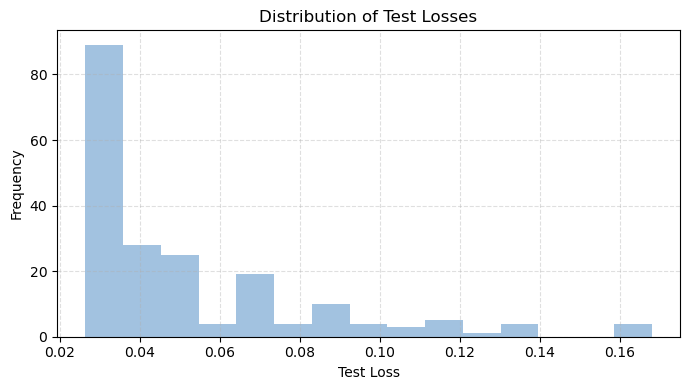

In [43]:
# evaluate model on test data
test_loss = 0
test_losses = []

for i in range(n_test):
    u = x_test[i]
    target = y_test[i]
    loss,_ = model.loss_and_grads(u, target)    # only need loss
    # print(loss)
    test_losses.append(loss)
    test_loss += loss

print(f'Test loss: {test_loss / n_test:.4f}')

plt.figure(figsize=(7, 4))
plt.hist(test_losses, bins=15, color="#A2C2E0")
plt.title("Distribution of Test Losses")
plt.xlabel("Test Loss")
plt.ylabel("Frequency")
plt.grid(alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()

Could possibly use the hist plot -> evaluate generalization

Most predictions are accurate - low loss -> predicted outputs were close to actual targets

only a few test cases were harder for the model and gave higher error (rightmost bars)

overall good result. model perfoms well on most test data

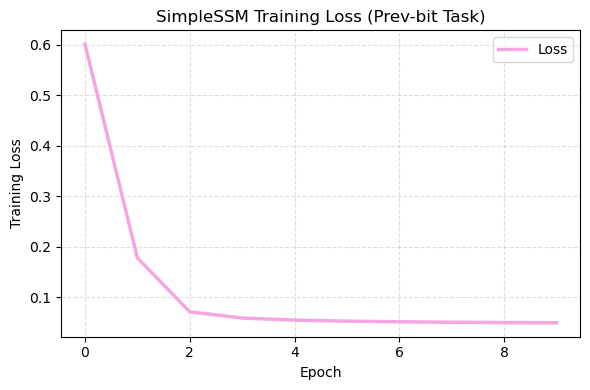

In [44]:
# visualziatoin

plt.figure(figsize=(6,4))
plt.plot(train_losses, color='#F5A6E1', linewidth=2.5, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('SimpleSSM Training Loss (Prev-bit Task)')
plt.grid(alpha=0.4, linestyle='--')
plt.tight_layout()
plt.legend()
plt.show()

extra for visualization: see how well our model performs on random test sequence

In [45]:
from SSM.helpers import sigmoid

idx = np.random.randint(0, len(x_test))
input_seq = x_test[idx]
target_seq = y_test[idx]
pred_logits, _ = model.forward(input_seq)
pred_seq = (sigmoid(pred_logits) > 0.5).astype(int)

print("Input:\n", input_seq.ravel().astype(int))
print("Target:\n", target_seq.ravel().astype(int))
print("Pred:\n", pred_seq.ravel())
print(f'\naccuracy: {accuracy_score(pred_seq.ravel(),target_seq.ravel().astype(int)):.2%}')

print('\npretty good!')

Input:
 [1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0]
Target:
 [1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1]
Pred:
 [0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1]

accuracy: 96.67%

pretty good!


Concluding notes for this task:
- this model can learn a linear dynamical system with structured memory (HiPPO/S4-inspired)
- SSMs like this model can retain info across time, even w/ simple architecture and no RNN/attenuation layers
- prev-bit success => evidence that our model encodes recent history into its hidden state using the SSM matrices